# ESE 527 Project
## Data-Driven Analytics for Obesity Management and Business Strategy
### Team ZY
### Team members: Zhetan Zhang, Mingqi Yang

## 1. Data preprocessing

### Read and check data set

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [2]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### One-hot encoding

In [3]:
df_object = df.select_dtypes(include=[object])
df_numerics = df.select_dtypes(include='number')

In [4]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(df_object)
encoded_df = pd.DataFrame(enc.transform(df_object).toarray(),columns=enc.get_feature_names_out())

In [5]:
new_df = pd.concat([df_numerics, encoded_df], axis=1, join="inner")
new_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Normalization

In [6]:
normalized_df = (new_df-new_df.min())/(new_df.max()-new_df.min())
normalized_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,0.148936,0.320755,0.186567,0.5,0.666667,0.500000,0.000000,0.500000,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.148936,0.132075,0.126866,1.0,0.666667,1.000000,1.000000,0.000000,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.191489,0.660377,0.283582,0.5,0.666667,0.500000,0.666667,0.500000,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.276596,0.660377,0.358209,1.0,0.666667,0.500000,0.666667,0.000000,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.170213,0.622642,0.379104,0.5,0.000000,0.500000,0.000000,0.000000,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.148443,0.491943,0.689616,1.0,0.666667,0.364070,0.558756,0.453124,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2107,0.169850,0.563366,0.707037,1.0,0.666667,0.502565,0.447130,0.299635,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2108,0.181362,0.570200,0.706637,1.0,0.666667,0.527097,0.471403,0.323144,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2109,0.220467,0.546132,0.704079,1.0,0.666667,0.926170,0.379702,0.293017,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Visualization

Numerical data

<AxesSubplot:ylabel='Frequency'>

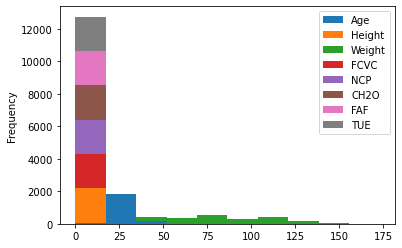

In [7]:
#original data distribution
df_numerics.plot.hist(stacked=True,bins = 10)

<AxesSubplot:ylabel='Frequency'>

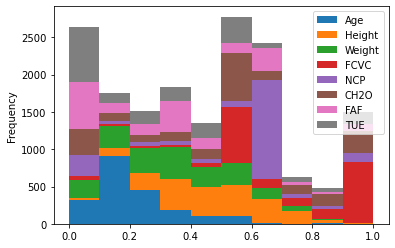

In [8]:
#normalized data distribution
normalized_df.iloc[:,0:8].plot.hist(stacked=True,bins = 10)

Categorical data

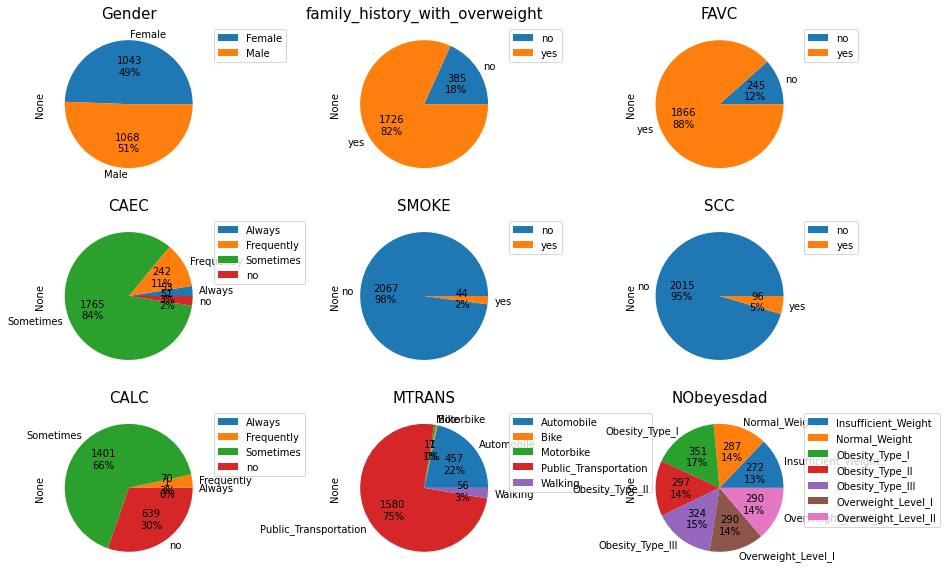

In [9]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
fig = plt.figure(1, figsize=(15, 10))
plt.clf()
#create subplot
gs = fig.add_gridspec(3,3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])
ax7 = fig.add_subplot(gs[2, 0])
ax8 = fig.add_subplot(gs[2, 1])
ax9 = fig.add_subplot(gs[2, 2])
subplot_list = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]
for i in range(9):
    df_object.groupby(df_object.columns[i]).size().plot(kind = 'pie',autopct=label_function,ax = subplot_list[i])
    subplot_list[i].set_title(df_object.columns[i],size = 15)
    subplot_list[i].legend(loc = 'upper left',bbox_to_anchor=(1, 1))
plt.draw()
plt.show()

### Anomaly Detection

Numerical Data

In [33]:
df_numerics

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


Feature Age:
Number of normal data points: 2087
Number of anomalies: 24
Percentage of anomalies: 1.149976042165788% 



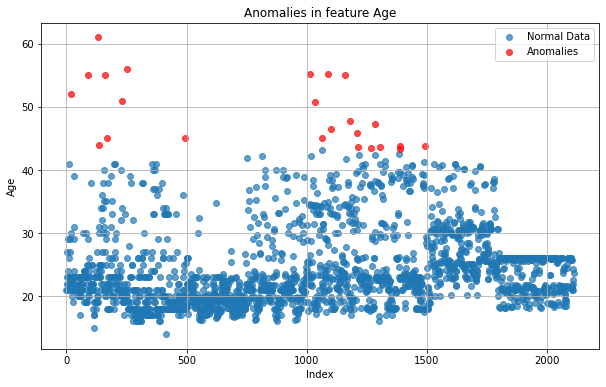

Feature Height:
Number of normal data points: 2111
Number of anomalies: 0
Percentage of anomalies: 0.0% 



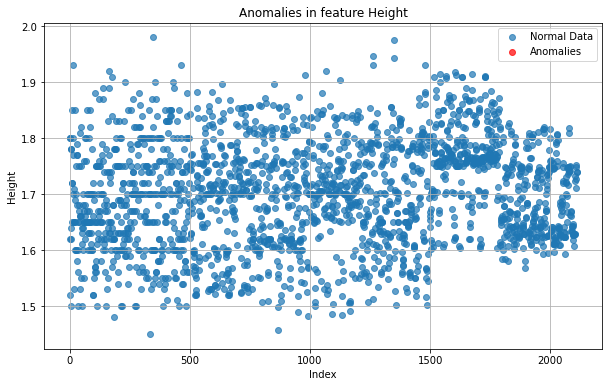

Feature Weight:
Number of normal data points: 2110
Number of anomalies: 1
Percentage of anomalies: 0.047393364928909956% 



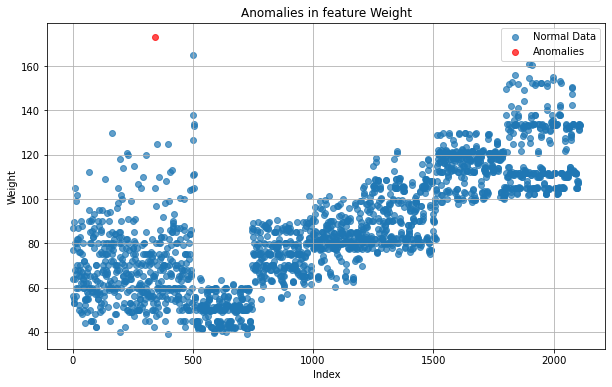

Feature FCVC:
Number of normal data points: 2111
Number of anomalies: 0
Percentage of anomalies: 0.0% 



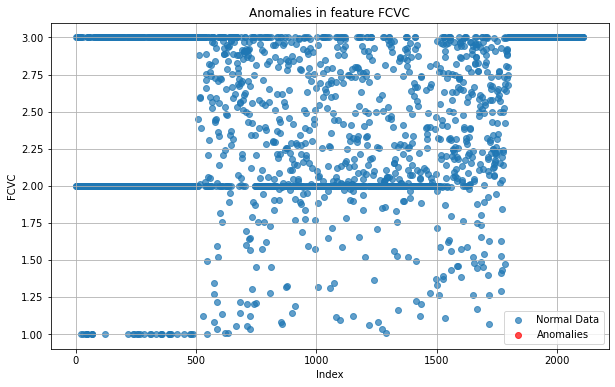

Feature NCP:
Number of normal data points: 2111
Number of anomalies: 0
Percentage of anomalies: 0.0% 



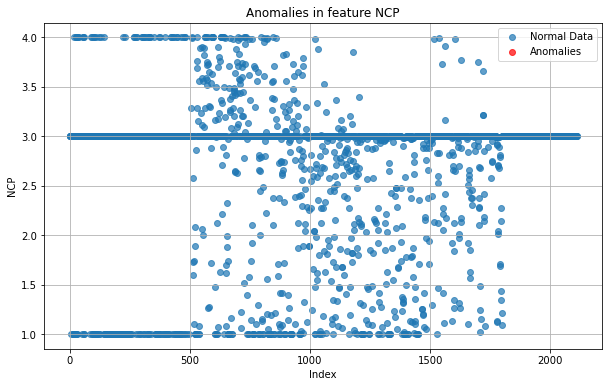

Feature CH2O:
Number of normal data points: 2111
Number of anomalies: 0
Percentage of anomalies: 0.0% 



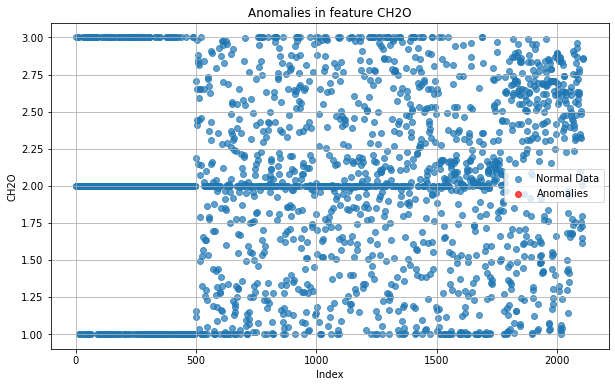

Feature FAF:
Number of normal data points: 2111
Number of anomalies: 0
Percentage of anomalies: 0.0% 



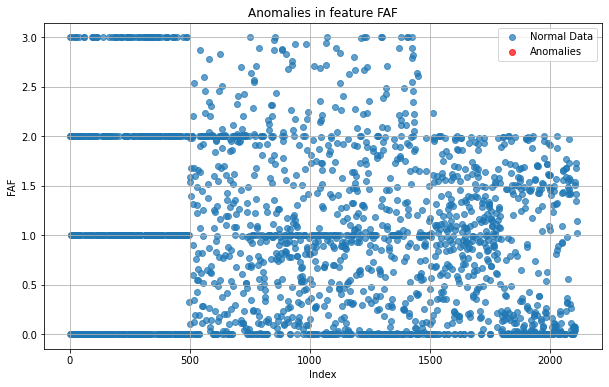

Feature TUE:
Number of normal data points: 2111
Number of anomalies: 0
Percentage of anomalies: 0.0% 



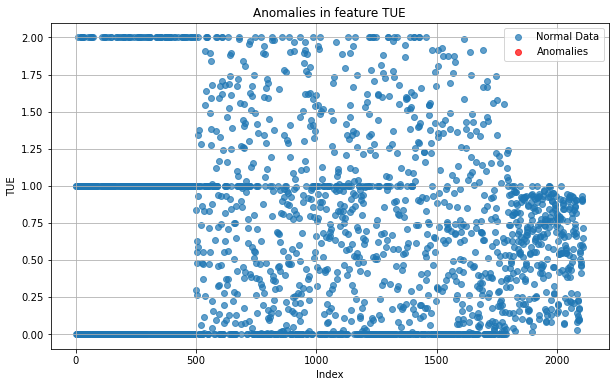

In [34]:
# Anomaly Detection using statistical approach
anomaly_sample = {}

for column in df_numerics.columns:
    mean_val = df_numerics[column].mean()
    std_val = df_numerics[column].std()
    
    # Define the boundaries between anomalies and normal values
    lower_bound = mean_val - 3 * std_val
    upper_bound = mean_val + 3 * std_val
    
    # Find anomalies for this column
    normal_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    anomalies = df_numerics[(df_numerics[column] < lower_bound) | (df_numerics[column] > upper_bound)]
    anomaly_sample[column] = anomalies
    
    # Print counts
    print(f"Feature {column}:")
    print(f"Number of normal data points: {len(normal_data)}")
    print(f"Number of anomalies: {len(anomalies)}")
    print(f"Percentage of anomalies: {len(anomalies)/len(normal_data) * 100}% \n")

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(normal_data.index, normal_data[column], label='Normal Data', alpha=0.7)
    plt.scatter(anomalies.index, anomalies[column], color='red', label='Anomalies', alpha=0.7)
    plt.title(f"Anomalies in feature {column}")
    plt.xlabel("Index")
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()

Categorical Data

In [32]:
df_object

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [35]:
# Anomaly detection using frequency-based detection
anomaly_sample = {}

for column in df_object.columns:
    feature_counts = df_object[column].value_counts()
    anomalies = feature_counts[feature_counts < 5]
    anomaly_sample[column] = anomalies

In [37]:
for feature, anomaly_data in anomaly_sample.items():
    print(f"Anomalies in {feature}:")
    print(anomaly_data, "\n")

Anomalies in Gender:
Series([], Name: Gender, dtype: int64) 

Anomalies in family_history_with_overweight:
Series([], Name: family_history_with_overweight, dtype: int64) 

Anomalies in FAVC:
Series([], Name: FAVC, dtype: int64) 

Anomalies in CAEC:
Series([], Name: CAEC, dtype: int64) 

Anomalies in SMOKE:
Series([], Name: SMOKE, dtype: int64) 

Anomalies in SCC:
Series([], Name: SCC, dtype: int64) 

Anomalies in CALC:
Always    1
Name: CALC, dtype: int64 

Anomalies in MTRANS:
Series([], Name: MTRANS, dtype: int64) 

Anomalies in NObeyesdad:
Series([], Name: NObeyesdad, dtype: int64) 



In [44]:
# Visualize this anomaly sample
anomaly_row = df[df['CALC'] == 'Always']
print(anomaly_row)

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
26   Male  21.0     1.7    65.0                            yes  yes   2.0   

    NCP        CAEC SMOKE  CH2O SCC  FAF  TUE    CALC   MTRANS     NObeyesdad  
26  1.0  Frequently    no   2.0  no  1.0  2.0  Always  Walking  Normal_Weight  
